In [1]:
# tables and math
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# due to a bug
pd.core.common.is_list_like = pd.api.types.is_list_like


In [5]:
from pandas_datareader import DataReader
from pandas_datareader import data as pdr

In [6]:
from datetime import datetime
from __future__ import division

In [7]:
tech_list = ['AAPL','MSFT','AMZN','IBM']
end = datetime(2018,4,4,18,00)
start = datetime(end.year - 1, end.month, end.day)

In [12]:
symbols = {stock:DataReader(stock,'yahoo',start,end) for stock in tech_list}

In [16]:
symbols['AAPL'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-04,144.889999,143.169998,143.250000,144.770004,19891400.0,140.979980
2017-04-05,145.460007,143.809998,144.220001,144.020004,27717900.0,140.249619
2017-04-06,144.520004,143.449997,144.289993,143.660004,21149000.0,139.899048
2017-04-07,144.179993,143.270004,143.729996,143.339996,16672200.0,139.587402
2017-04-10,143.880005,142.899994,143.600006,143.169998,18933400.0,139.421860


In [17]:
symbols['AAPL'].describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,161.881706,159.393374,160.651389,160.669802,2.973645e+07,157.802519
std,11.532459,11.252567,11.349264,11.367555,1.233815e+07,11.808918
min,141.880005,140.059998,141.220001,140.679993,1.402670e+07,136.997055
25%,153.904999,150.987503,152.989998,152.754997,2.108535e+07,149.225685
50%,160.710007,158.055000,159.305000,159.704994,2.625485e+07,156.779167
75%,172.962498,170.119999,171.850002,171.534996,3.508818e+07,169.247177
max,183.500000,180.210007,182.589996,181.720001,8.659380e+07,179.762085


In [27]:
symbols['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-04-04 to 2018-04-04
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


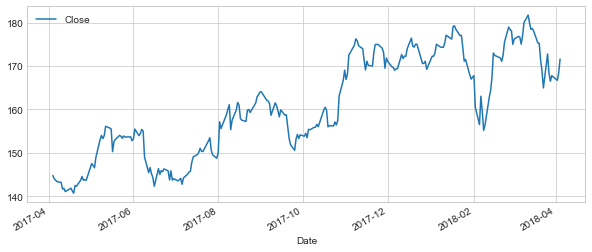

In [30]:
symbols['AAPL']['Close'].plot(legend=True, figsize=(10,4))

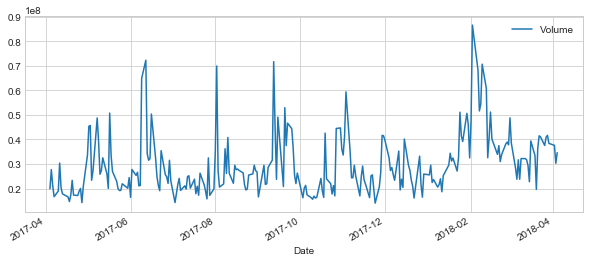

In [31]:
symbols['AAPL']['Volume'].plot(legend=True, figsize=(10,4))

In [38]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    symbols["AAPL"][column_name] = symbols['AAPL']['Close'].rolling(window=ma).mean()

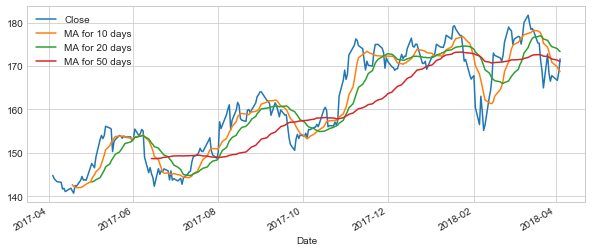

In [41]:
symbols["AAPL"][['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

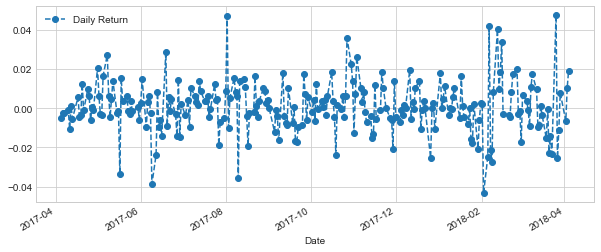

In [46]:
symbols['AAPL']['Daily Return'] = symbols['AAPL']['Close'].pct_change()
symbols['AAPL']['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


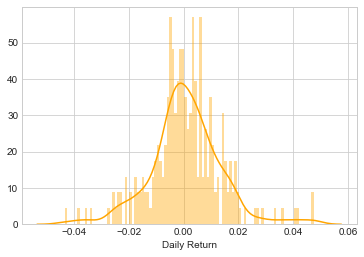

In [47]:
sns.distplot(symbols['AAPL']['Daily Return'].dropna(),bins=100,color='orange')

In [48]:
tech_list

['AAPL', 'MSFT', 'AMZN', 'IBM']

In [55]:
closing_df2 = DataReader(tech_list,'yahoo',start,end)['Close']

In [63]:
closing_df = pd.concat([symbols['AAPL']['Close'],symbols['MSFT']['Close'],symbols['AMZN']['Close'],symbols['IBM']['Close']],axis=1)
closing_df.columns = tech_list

In [64]:
closing_df.head()

,AAPL,MSFT,AMZN,IBM
Date,,,,
2017-04-04,144.770004,65.730003,906.830017,174.520004
2017-04-05,144.020004,65.559998,909.280029,172.880005
2017-04-06,143.660004,65.730003,898.280029,172.449997
2017-04-07,143.339996,65.680000,894.880005,172.139999
2017-04-10,143.169998,65.529999,907.039978,171.199997


In [65]:
type(closing_df)

pandas.core.frame.DataFrame

In [66]:
tech_rets = closing_df.pct_change()

In [67]:
tech_rets.head()

,AAPL,MSFT,AMZN,IBM
Date,,,,
2017-04-04,NaN,NaN,NaN,NaN
2017-04-05,-0.005181,-0.002586,0.002702,-0.009397
2017-04-06,-0.002500,0.002593,-0.012097,-0.002487
2017-04-07,-0.002228,-0.000761,-0.003785,-0.001798
2017-04-10,-0.001186,-0.002284,0.013588,-0.005461


In [68]:
tech_rets.describe()

,AAPL,MSFT,AMZN,IBM
count,251.000000,251.000000,251.000000,251.000000
mean,0.000763,0.001445,0.001887,-0.000421
std,0.013087,0.013461,0.015994,0.012240
min,-0.043390,-0.051334,-0.052061,-0.049162
25%,-0.005421,-0.004403,-0.005452,-0.005764
50%,0.000176,0.001071,0.001782,0.000000
75%,0.007559,0.007416,0.009966,0.004627
max,0.047472,0.075705,0.132164,0.088645


In [70]:
tech_rets.dropna().head()

,AAPL,MSFT,AMZN,IBM
Date,,,,
2017-04-05,-0.005181,-0.002586,0.002702,-0.009397
2017-04-06,-0.002500,0.002593,-0.012097,-0.002487
2017-04-07,-0.002228,-0.000761,-0.003785,-0.001798
2017-04-10,-0.001186,-0.002284,0.013588,-0.005461
2017-04-11,-0.010756,-0.000763,-0.005160,-0.003621


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


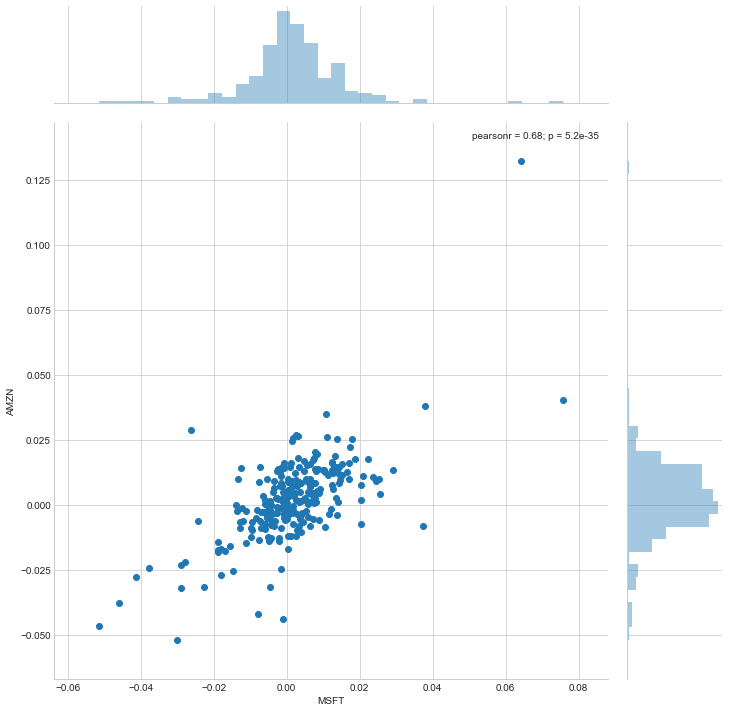

In [76]:
sns.jointplot(x='MSFT',y='AMZN', data=tech_rets, kind='scatter',size=10)

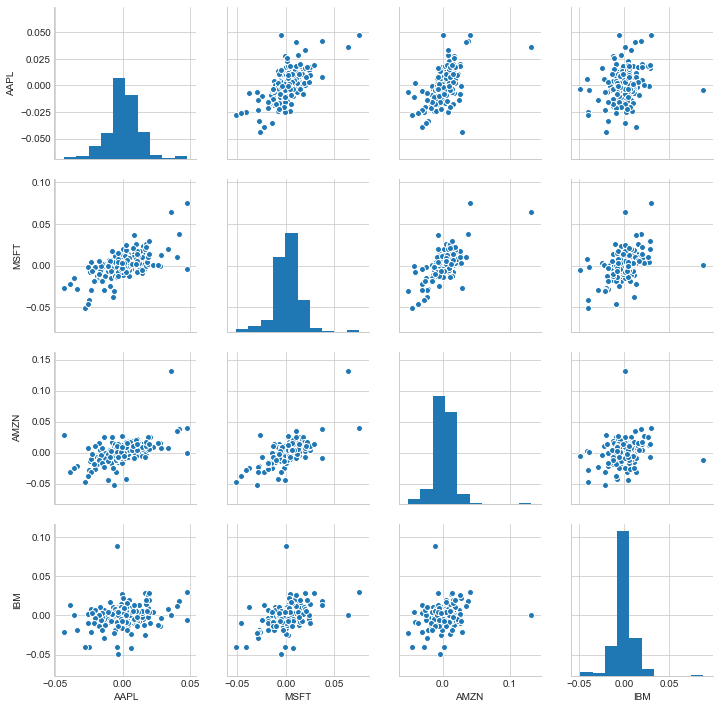

In [73]:
sns.pairplot(tech_rets.dropna())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


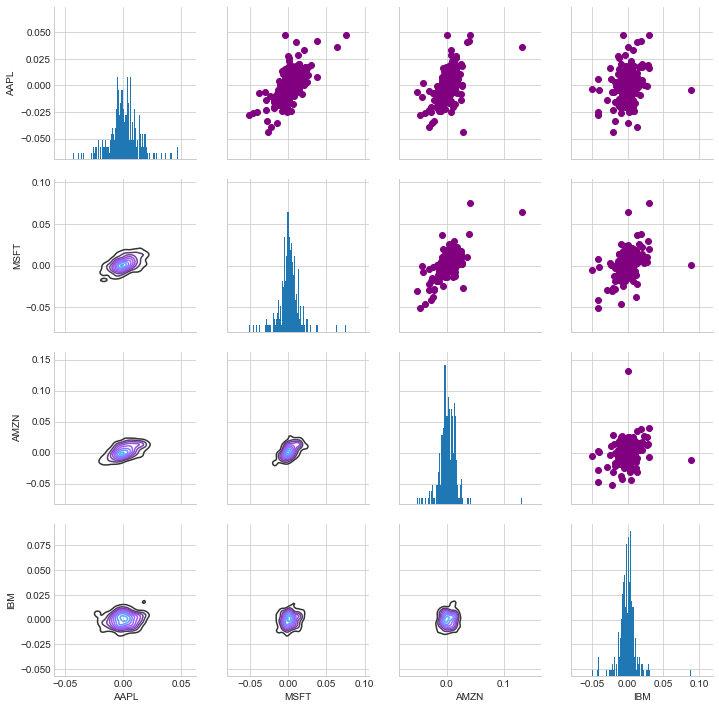

In [78]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=100)
